# # **Big Data Analystics Project**

# **Introduction**

Concern Worldwide and Wealth hunger life published the Global Hunger Index (GHI). It was initially published in 2006 and is released yearly in October. The 2021 edition of the Global Hunger Index (GHI) was the 16th edition of the index report. The main target of the Global Hunger Index is to track the hunger or poverty level at international and regional levels in different areas of the world.

The Global Hunger Index (GHI) is calculated based on 4 parameters, which are

* Child mortality
* Under-nourishment
* Child stunting
* Child wasting

The scoring process of nations in the Global Hunger Index (GHI) determines the hunger level of states on a scale of Zero to 100. This ranking process works in reverse order in this GHI index. The states that scored the least numbers, like 0, 1, 2, 3, 4, etc., are considered the best, with the least hunger or low food poverty in their country. Unlike the nations which fall under the category of "80s, '90s, and '100", they fall into the worst category in the GHI index.

**Prediction model on achieving the “Zero hunger” SDG by 2030**

The UN has voted on the resolution to stop hunger worldwide by 2030 in the
so-called “Zero Hunger” to implement sustainable development. In this project, we want to know if that goal will be achieved and when.
Our goal is to predict if, by the year 2030, the UN will have achieved the zero hunger target.

Each indicator is given a standardised score on a 100 point scale based on the highest observed level for the indicator on a global scale in recent decades. The scores are then aggregated to calculate the GHI score for each country.

These scores place a country along a severity scale:

Low = less than or equal to 9.9

Moderate = 10.0 - 19.9

Serious = 20.0 - 34.9

Alarming = 35.0 - 49.9

Extremely alarming = less than or equal to 50.0

# **Importing necessary libraries**

In [1]:
# data analysis and wrangling

import numpy as np 
import pandas as pd 
from pandas import Series,DataFrame

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# machine learning

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import utils

from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# **Importing datasets**

In [2]:
df_global_hunger_index = pd.read_csv("/kaggle/input/the-global-hunger-index/global-hunger-index.csv")
df_chridren_underweight = pd.read_csv("/kaggle/input/the-global-hunger-index/share-of-children-underweight.csv")
df_chridren_withweight = pd.read_csv("/kaggle/input/the-global-hunger-index/share-of-children-with-a-weight-too-low-for-their-height-wasting.csv")
df_chridren_younger5 = pd.read_csv("/kaggle/input/the-global-hunger-index/share-of-children-younger-than-5-who-suffer-from-stunting.csv")

# **Understanding the datasets**

In [3]:
df_global_hunger_index.head()

,Entity,Code,Year,Global Hunger Index (2021),411773-annotations
0,Afghanistan,AFG,2000,50.9,NaN
1,Afghanistan,AFG,2006,42.7,NaN
2,Afghanistan,AFG,2012,34.3,NaN
3,Afghanistan,AFG,2021,28.3,NaN
4,Albania,ALB,2000,20.7,NaN


In [4]:
df_chridren_underweight.head()

,Entity,Code,Year,"Prevalence of underweight, weight for age (% of children under 5)"
0,Afghanistan,AFG,1997,44.900002
1,Afghanistan,AFG,2004,32.900002
2,Afghanistan,AFG,2013,24.600000
3,Afghanistan,AFG,2018,19.100000
4,Albania,ALB,1997,7.100000


In [5]:
df_chridren_withweight.head()

,Entity,Code,Year,"Prevalence of wasting, weight for height (% of children under 5)"
0,Afghanistan,AFG,1997,18.200001
1,Afghanistan,AFG,2004,8.600000
2,Afghanistan,AFG,2013,9.500000
3,Afghanistan,AFG,2018,5.100000
4,Albania,ALB,1997,8.100000


In [6]:
df_chridren_younger5.head()

,Entity,Code,Year,"Prevalence of stunting, height for age (% of children under 5)"
0,Afghanistan,AFG,1997,53.200001
1,Afghanistan,AFG,2004,59.299999
2,Afghanistan,AFG,2013,40.400002
3,Afghanistan,AFG,2018,38.200001
4,Albania,ALB,1997,20.400000


In [7]:
df_global_hunger_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Entity                      471 non-null    object 
 1   Code                        471 non-null    object 
 2   Year                        471 non-null    int64  
 3   Global Hunger Index (2021)  471 non-null    float64
 4   411773-annotations          12 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 18.5+ KB


In [8]:
df_global_hunger_index

,Entity,Code,Year,Global Hunger Index (2021),411773-annotations
0,Afghanistan,AFG,2000,50.9,NaN
1,Afghanistan,AFG,2006,42.7,NaN
2,Afghanistan,AFG,2012,34.3,NaN
3,Afghanistan,AFG,2021,28.3,NaN
4,Albania,ALB,2000,20.7,NaN
...,...,...,...,...,...
466,Yemen,YEM,2006,38.8,NaN
467,Yemen,YEM,2012,38.4,NaN
468,Yemen,YEM,2021,45.1,NaN
469,Zambia,ZMB,2021,27.5,Value represents the mid-point of its group in...


**Check Null Values**

In [9]:
df_global_hunger_index.isnull().sum()

Entity                          0
Code                            0
Year                            0
Global Hunger Index (2021)      0
411773-annotations            459
dtype: int64

**Check duplicate values**

In [10]:
df_global_hunger_index.duplicated().sum()

0

**Let's see summary statistics of our dataset by applying describe(). **

In [11]:
df_global_hunger_index.describe()

,Year,Global Hunger Index (2021)
count,471.000000,471.000000
mean,2010.127389,19.824628
std,7.852951,13.449570
min,2000.000000,2.500000
25%,2006.000000,8.800000
50%,2012.000000,17.000000
75%,2021.000000,28.550000
max,2021.000000,65.100000


Years do we have in our dataset

In [12]:
df_years = df_global_hunger_index['Year'].unique()
df_years

array([2000, 2006, 2012, 2021])

**Visualization**

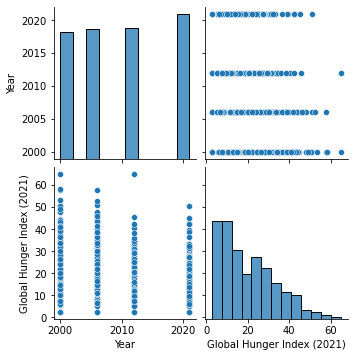

In [13]:
# Let's plot a pair plot of all variables in our dataframe
sns.pairplot(df_global_hunger_index)

In [14]:
#sns.heatmap(df_global_hunger_index.corr(),annot=True)

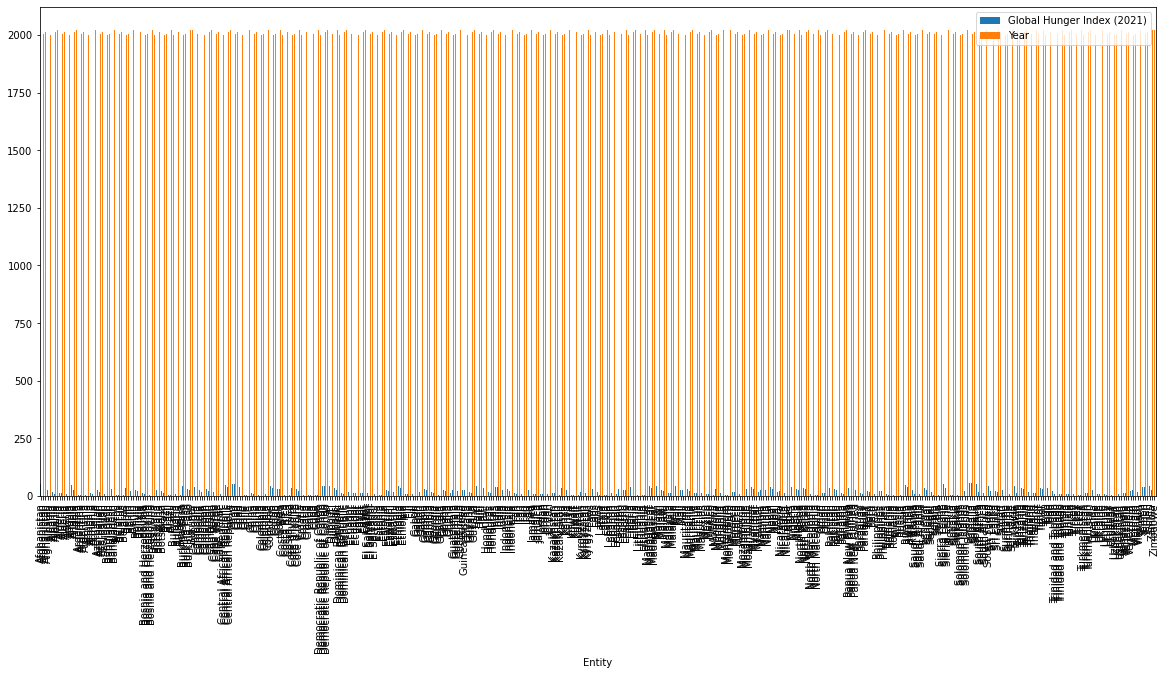

In [15]:
df_global_hunger_index.plot(x="Entity", y=["Global Hunger Index (2021)","Year"], kind="bar", figsize=(20, 9))
plt.show()                     

# **Data Pre-processing**

**Renaming columns**

In [16]:
df_global_hunger_index.rename(columns={'Entity':'Country','Global Hunger Index (2021)': 'GHI'}, inplace=True)
df_global_hunger_index.head()

,Country,Code,Year,GHI,411773-annotations
0,Afghanistan,AFG,2000,50.9,NaN
1,Afghanistan,AFG,2006,42.7,NaN
2,Afghanistan,AFG,2012,34.3,NaN
3,Afghanistan,AFG,2021,28.3,NaN
4,Albania,ALB,2000,20.7,NaN


**Remove unwanted column "411773-annotations"**

In [17]:
df_global_hunger_index.drop('411773-annotations', inplace=True, axis=1)
df_global_hunger_index

,Country,Code,Year,GHI
0,Afghanistan,AFG,2000,50.9
1,Afghanistan,AFG,2006,42.7
2,Afghanistan,AFG,2012,34.3
3,Afghanistan,AFG,2021,28.3
4,Albania,ALB,2000,20.7
...,...,...,...,...
466,Yemen,YEM,2006,38.8
467,Yemen,YEM,2012,38.4
468,Yemen,YEM,2021,45.1
469,Zambia,ZMB,2021,27.5


**Remove null variables**

In [18]:
df_global_hunger_index.dropna(axis=1)

,Country,Code,Year,GHI
0,Afghanistan,AFG,2000,50.9
1,Afghanistan,AFG,2006,42.7
2,Afghanistan,AFG,2012,34.3
3,Afghanistan,AFG,2021,28.3
4,Albania,ALB,2000,20.7
...,...,...,...,...
466,Yemen,YEM,2006,38.8
467,Yemen,YEM,2012,38.4
468,Yemen,YEM,2021,45.1
469,Zambia,ZMB,2021,27.5


**Pivotting data**

In [19]:
df_GHI = df_global_hunger_index.pivot(index='Country', columns='Year', values='GHI')
df_GHI = df_GHI.reset_index()
df_GHI.head()

Year,Country,2000,2006,2012,2021
0,Afghanistan,50.9,42.7,34.3,28.3
1,Albania,20.7,15.9,8.8,6.2
2,Algeria,14.5,11.7,8.9,6.9
3,Angola,65.0,46.9,27.8,26.0
4,Argentina,6.4,5.6,5.2,5.3


# **Analysis**

**How many countries do we have in our dtasets**

In [20]:
Countries = df_GHI["Country"].unique()
Countries

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Azerbaijan', 'Bangladesh', 'Belarus', 'Benin',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Democratic Republic of Congo', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Gabon', 'Gambia', 'Georgia',
       'Ghana', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Honduras', 'India', 'Indonesia', 'Iran', 'Iraq', 'Jamaica',
       'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait', 'Kyrgyzstan', 'Laos',
       'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Lithuania',
       'Madagascar', 'Malawi', 'Malaysia', 'Mali', 'Mauritania',
       'Mauritius', 'Mexico',

In [21]:
Number_countries = df_GHI["Country"].unique().size
Number_countries

128

Very good, it looks like we have enough countries to do our analysis and prediction. 

**Global Hunger Index distribution plot between 2000 to 2021**

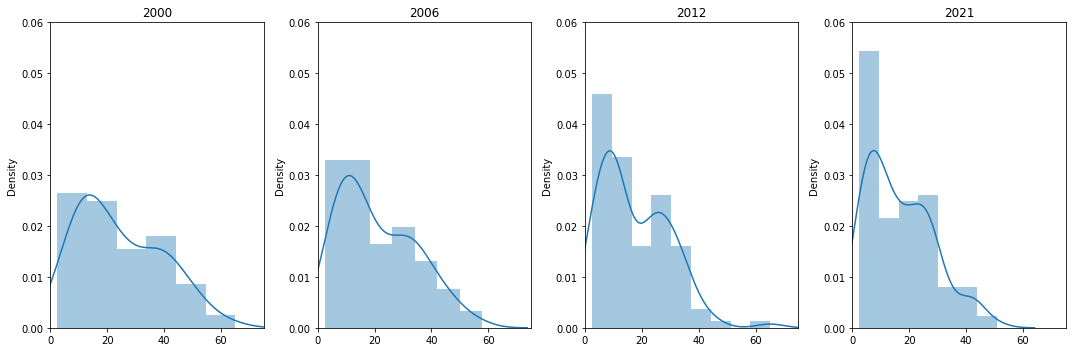

In [22]:
col=[2000,2006,2012,2021]
fig = plt.figure(figsize=(15,5))

for i in range(len(col)):
    plt.subplot(1,4,i+1)
    plt.title(col[i])
    sns.distplot(df_GHI,x=df_GHI[col[i]])
    plt.xlim([0,75])
    plt.ylim([0,0.06])
plt.tight_layout()
plt.show()

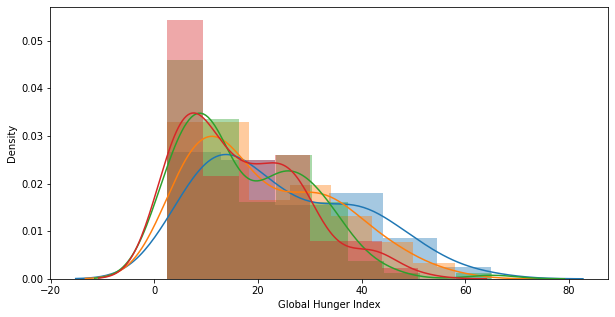

In [23]:
col=[2000,2006,2012,2021]
plt.figure(figsize=(10, 5))
for i in col:
    sns.distplot(df_GHI[i],axlabel='Global Hunger Index')

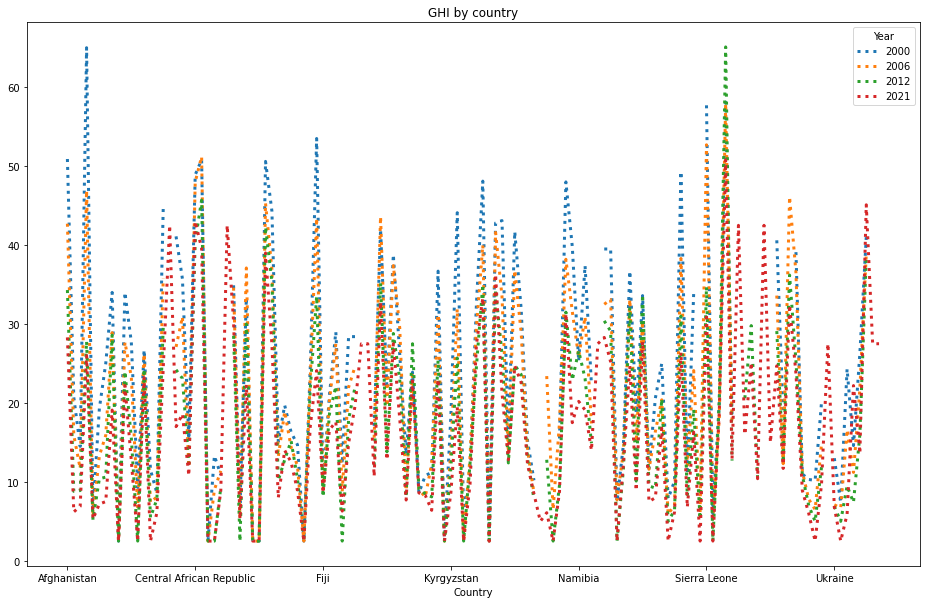

In [24]:
df_GHI = pd.DataFrame(data=df_GHI)

df_GHI.plot.line(x='Country',linestyle = ':', linewidth='3', figsize=(16, 10))

plt.title('GHI by country')
plt.show()

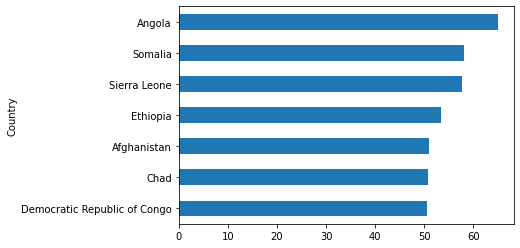

In [25]:
df_GHI[df_GHI[2000]>=50].sort_values(by=2000,ascending=True).plot.barh(y=2000,x='Country',legend=False);

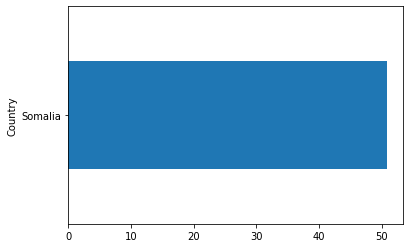

In [26]:
df_GHI[df_GHI[2021]>=50].sort_values(by=2021,ascending=True).plot.barh(y=2021,x='Country',legend=False);

In 2021 Somalia is the only country in Extremely alarming category.

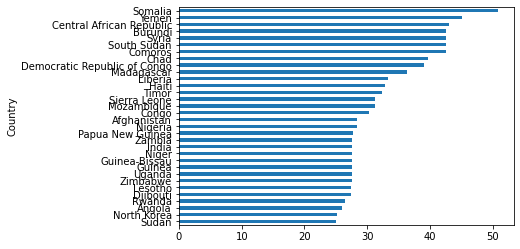

In [27]:
df_GHI[df_GHI[2021]>=25].sort_values(by=2021,ascending=True).plot.barh(y=2021,x='Country',legend=False);

Ten counties, 8 from Africa and 2 from Asia are in alarming category in 2021.

**Let's see countries in Low and Modelate categories**

In [28]:
(df_GHI[2021] < 20).sum()

81

In 2021, we have 81 countries in Moderate and Low categories.

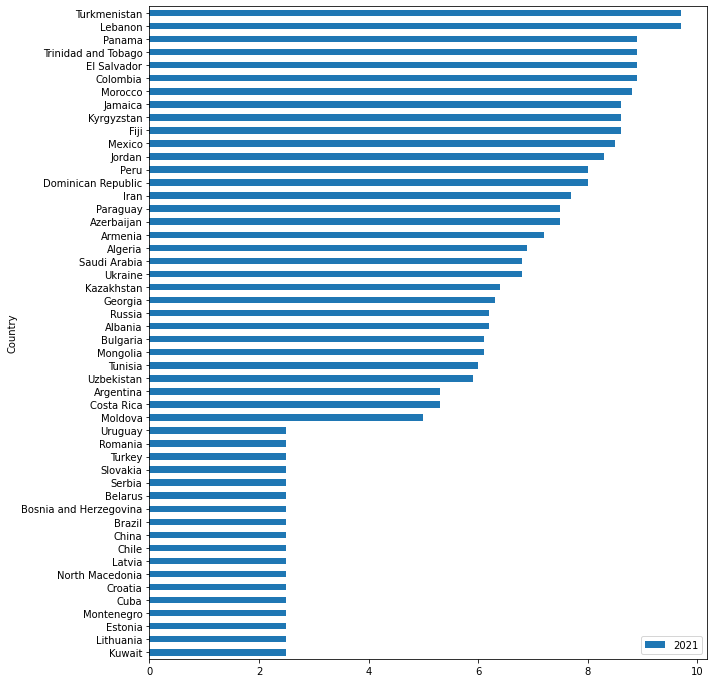

In [29]:
df_GHI[df_GHI[2021]< 10].sort_values(by=2021,ascending=True).plot.barh(y=2021,x='Country',legend=True, figsize=(10, 12));
#plt.figure(figsize=(12, 50))

In [30]:
(df_GHI[2021] < 10).sum()

50

Only 50 countries in world are in low category in 2021.

In [31]:
Low_Countries = df_GHI.where (df_GHI[2021] < 10)
Low_Countries = Low_Countries.dropna()
Low_Countries


Year,Country,2000,2006,2012,2021
1,Albania,20.7,15.9,8.8,6.2
2,Algeria,14.5,11.7,8.9,6.9
4,Argentina,6.4,5.6,5.2,5.3
5,Armenia,19.3,13.3,10.4,7.2
6,Azerbaijan,25.0,15.9,10.6,7.5
8,Belarus,2.5,2.5,2.5,2.5
11,Bosnia and Herzegovina,9.3,6.7,2.5,2.5
13,Brazil,11.5,7.4,5.5,2.5
14,Bulgaria,8.6,8.1,7.8,6.1
22,Chile,2.5,2.5,2.5,2.5


UN target in 2021 is to achieve GHI of 18.5 for all countries

**How many countries are above the target in 2021?**

The target in 2021 is that at least all countries should have GHI of 18.5.

In [32]:
High_Countries = df_GHI.where (df_GHI[2021] > 18.5)
High_Countries = High_Countries.dropna()
High_Countries

Year,Country,2000,2006,2012,2021
0,Afghanistan,50.9,42.7,34.3,28.3
3,Angola,65.0,46.9,27.8,26.0
7,Bangladesh,34.0,28.9,28.6,19.1
9,Benin,34.0,27.7,24.0,22.2
12,Botswana,26.7,26.2,24.3,23.2
15,Burkina Faso,44.9,35.8,29.7,24.5
18,Cameroon,35.7,30.9,23.1,18.6
20,Central African Republic,48.9,48.0,40.5,43.0
21,Chad,50.8,51.2,45.7,39.6
26,Congo,34.9,34.6,28.5,30.3


In [33]:
High_Countries[2021].count()

41

In 2021, there 41 countries which are not meeting the UN target.

**Learnings from Global Hunger Index 2021**

Based on current Global Hunger Index projections, the world and 41 nations, in particular, will fail to achieve a level of Zero hunger by 2030.

The analysis shows current setbacks against poverty and showcases the trouble ahead.
* In Europe, Latin America, Central Asia, the Caribbean, East and West Asia, Southeast Asia, and North Africa, hunger levels or poverty are low or moderate.
* Country Somalia suffers from an extremely alarming level of food poverty.
* Hunger is alarming in 7 nations: Yemen, Central African Republic, Syria, South Sudan, Comoros, Burundi, Chad, Democratic Republic of Congo, and Madagascar.

**What is the UN target in 2030?**


The UN target in 2030 is simple. Zero hunger on the globe.

The number of people affected by hunger globally rose to as many as 828 million in 2021, an increase of about 46 million since 2020 and 150 million since the outbreak of the COVID-19 pandemic([resource](https://www.who.int/news/item/06-07-2022-un-report--global-hunger-numbers-rose-to-as-many-as-828-million-in-2021), according to a United Nations report that provides fresh evidence that the world is moving further away from its goal of ending hunger, food insecurity and malnutrition in all its forms by 2030.

# **Linear Regression Model**

**Splitting the data**

In [34]:

X = df_GHI.dropna(axis=1)
y = df_GHI.dropna(axis=1)

X = df_GHI.drop('Country',axis=1)
y = df_GHI.drop('Country',axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.30)

In [35]:
# X_train = X_train.dropna
# X_test = X_test.dropna

# y_train = y_train.dropna
# y_test = y_test.dropna

In [36]:
X_train

Year,2000,2006,2012,2021
100,57.7,52.7,34.7,31.3
6,25.0,15.9,10.6,7.5
92,20.6,16.4,9.2,8.0
52,26.1,29.5,23.0,18.0
97,11.0,12.1,8.2,6.8
...,...,...,...,...
67,42.8,41.6,34.3,36.3
64,32.5,29.6,24.6,27.4
117,10.2,6.5,5.0,2.5
47,NaN,NaN,NaN,27.5


In [37]:
print(X_train.shape)

(89, 4)


In [38]:
print(y_test.shape)

(39, 4)


**Selecting model**

In [39]:
X_train = X_train.dropna()
y_train = y_train.dropna()

X_test = X_test.dropna()
y_test = y_test.dropna()

In [40]:
# Linear_model.fit(X_train,y_train)

**Model Fitting**

In [41]:
# Linear_model.fit(X_train,y_train)

**Prediction**

In [42]:
# y_pred = Linear_model.predict(X_test)
# y_pred

**Evaluation**

In [43]:
# from sklearn import metrics

# R2=metrics.r2_score(y_test,y_pred)
# R2

In [44]:
# print(metrics.mean_absolute_error(y_test,y_pred))

In [45]:
# # print(Linear_model.predict([[2030]])) 

# prediction = Linear_model.predict([[2025,2030,2035,2040]])
# prediction

**Assumptions**

**Normality**

**Linearity**

**Decisin Tree Regressor**

In [46]:
df_GHI.index

RangeIndex(start=0, stop=128, step=1)

In [47]:
train_df = df_GHI[[2000, 2006, 2012, 2021]].groupby([2000], as_index=False).mean().sort_values(by=2021, ascending=False)
train_df.dropna()
train_df

Year,2000,2006,2012,2021
92,58.1,57.9,65.1,50.8
74,41.0,38.8,38.4,45.1
85,48.9,48.0,40.5,43.0
88,50.8,51.2,45.7,39.6
87,50.6,45.3,42.3,39.0
...,...,...,...,...
7,7.9,5.9,5.0,2.5
9,9.3,6.7,2.5,2.5
23,13.3,9.0,2.5,2.5
18,11.5,7.4,5.5,2.5


In [48]:
test_df = df_GHI[[2000, 2006, 2012, 2021]].groupby([2000], as_index=False).mean().sort_values(by=2012, ascending=False)
test_df.dropna()
test_df

Year,2000,2006,2012,2021
92,58.1,57.9,65.1,50.8
88,50.8,51.2,45.7,39.6
87,50.6,45.3,42.3,39.0
85,48.9,48.0,40.5,43.0
74,41.0,38.8,38.4,45.1
...,...,...,...,...
6,7.5,7.7,2.5,2.5
9,9.3,6.7,2.5,2.5
21,12.3,8.8,2.5,6.3
1,5.5,2.5,2.5,2.5


In [49]:
X_train = train_df.drop(2021, axis=1)
Y_train = train_df[2012]
#X_test  = test_df
X_test  = test_df.drop(2012, axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((94, 3), (94,), (94, 3))

In [50]:
# # Logistic Regression

# lab_enc = preprocessing.LabelEncoder()
# X_train = lab_enc.fit_transform(X_train) 
# Y_train = lab_enc.fit_transform(Y_train) 
# X_test = lab_enc.fit_transform(X_test) 

# logreg = LogisticRegression()
# # Y_train = Y_train.reshape(-1, 1)
# logreg.fit(X_train, Y_train)

# Y_pred = logreg.predict(X_test)
# acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
# acc_log

In [51]:
# lab_enc = preprocessing.LabelEncoder()
# X_train = lab_enc.fit_transform(X_train) 
# Y_train = lab_enc.fit_transform(Y_train) 
# X_test = lab_enc.fit_transform(X_test) 

# X_test = X_train
# m1 = 'Logistic Regression'
# lr = LogisticRegression()
# model = lr.fit(X_train, Y_train)
# lr_predict = lr.predict(X_test)
# lr_conf_matrix = confusion_matrix(Y_test, lr_predict)
# lr_acc_score = accuracy_score(y_test, lr_predict)
# print("confussion matrix")
# print(lr_conf_matrix)
# print("\n")
# print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
# print(classification_report(Y_test,lr_predict))